Via: [Understanding Variational Autoencoders](https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73), [Differences Between AEs and VAEs](https://towardsdatascience.com/difference-between-autoencoder-ae-and-variational-autoencoder-vae-ed7be1c038f2)

In [2]:
from IPython.display import Image
import webp

Latent space
- compression of input
- efficient way of describing data numerically

input $\rarr$ encoder: compression to latent space $\rarr$ sampling $\rarr$ decoder: reconstruct to original dimensions $\rarr$ output

encoder space
- number, type, dimension of layers
- latent space dimension
- want highest compression without losing information

decoder space
- encoder in reverse (almost)
- antonyms of encoder layers
- any reconstruction errors based on how data was compressed in encoder

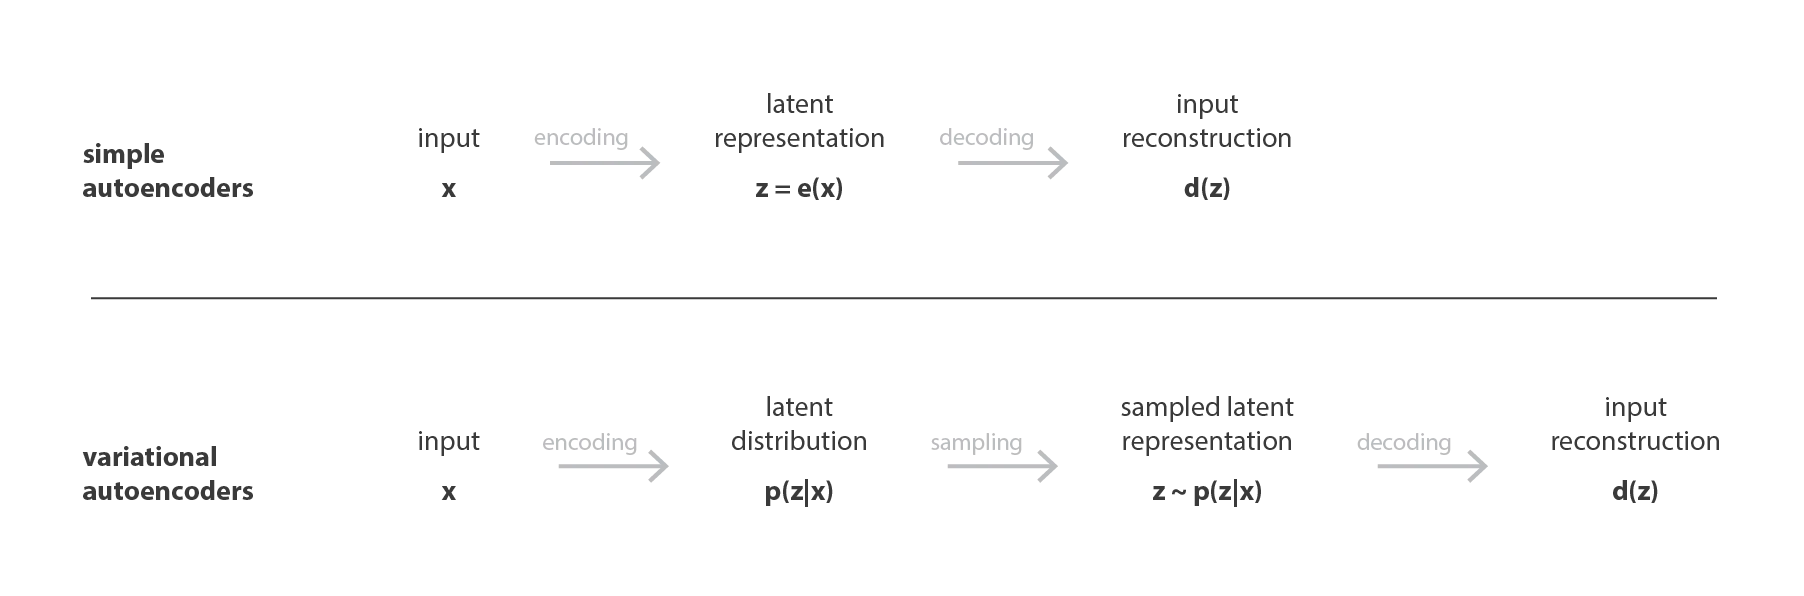

In [2]:
display(webp.load_image('../images/ae vs vae architecture.webp'))

Autoencoders compress data into a fixed (linear) latent space, which can cause data points of a group to vary (nonlinear) after compression. When mapping these numerical representations, that means that there can be <b>outliers</b> from a group, which prevents an autoencoder from generating an output that can also map back to the same group. This is useful for cases where you want to preserve more information by keeping everything unnormalized, like making exact (or almost) predictions.

Variational autoencoders are similar, except they <b>normalize the latent space</b> to remove outliers. This is useful for cases an autoencoder can't do, such as generating meaningful outputs. This is thanks to the [Kulback-Leibler divergence](https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73#:~:text=That%20regularisation%20term%20is%20expressed%20as%20the%20Kulback%2DLeibler%20divergence%20between%20the%20returned%20distribution%20and%20a%20standard%20Gaussian), or the measure of how one probability distribution $P(A)$ differs from another $P(B)$. The KLD is used as a <b>normalization term</b> to calculate the loss (see figure below)

The difference between them is the <b>output</b> of the encoder - in an autoencoder, the encoder layer <b>outputs the compressed latent data</b>, while a the encoder layer of a VAE <b>outputs the mean $\mu$ and the variance (the average squared deviations from the mean) $\sigma$</b> of each latent datapoint. The variance is represented by a <b>covariance matrix</b>, which is essentially the variance of each element represented in a diagonal. After the encoder, there's an additional step - the <b>reconstruction term</b> uses probability based on the $\mu$ and $\sigma$ to improve accuracy in the compressed latent representation. Then, it is passed through a decoder.

A visual here:

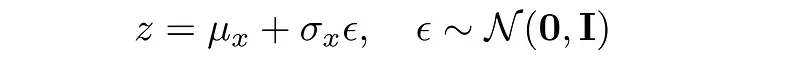

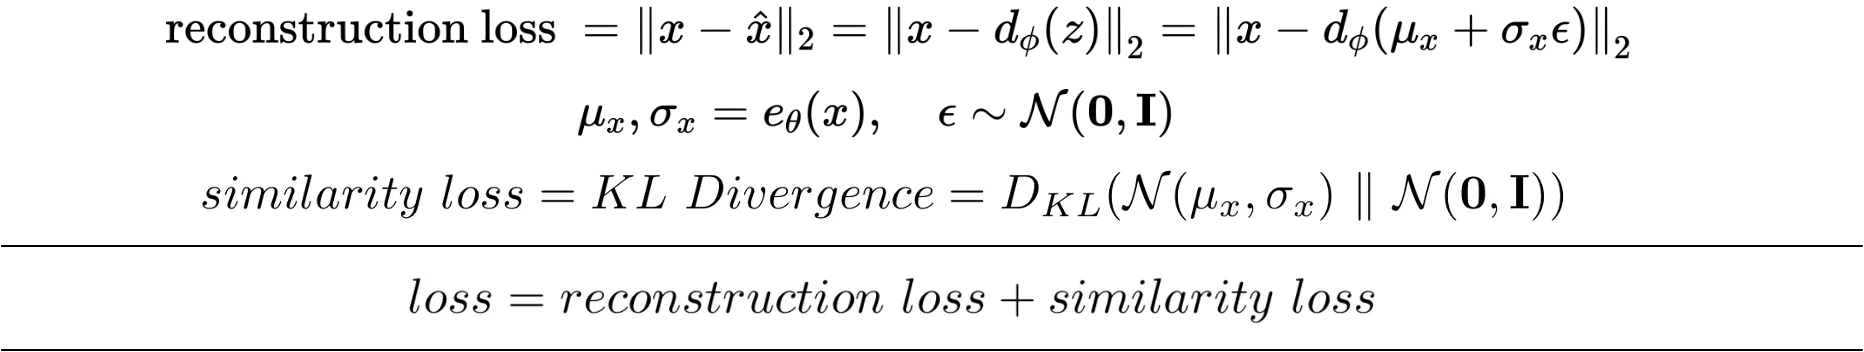

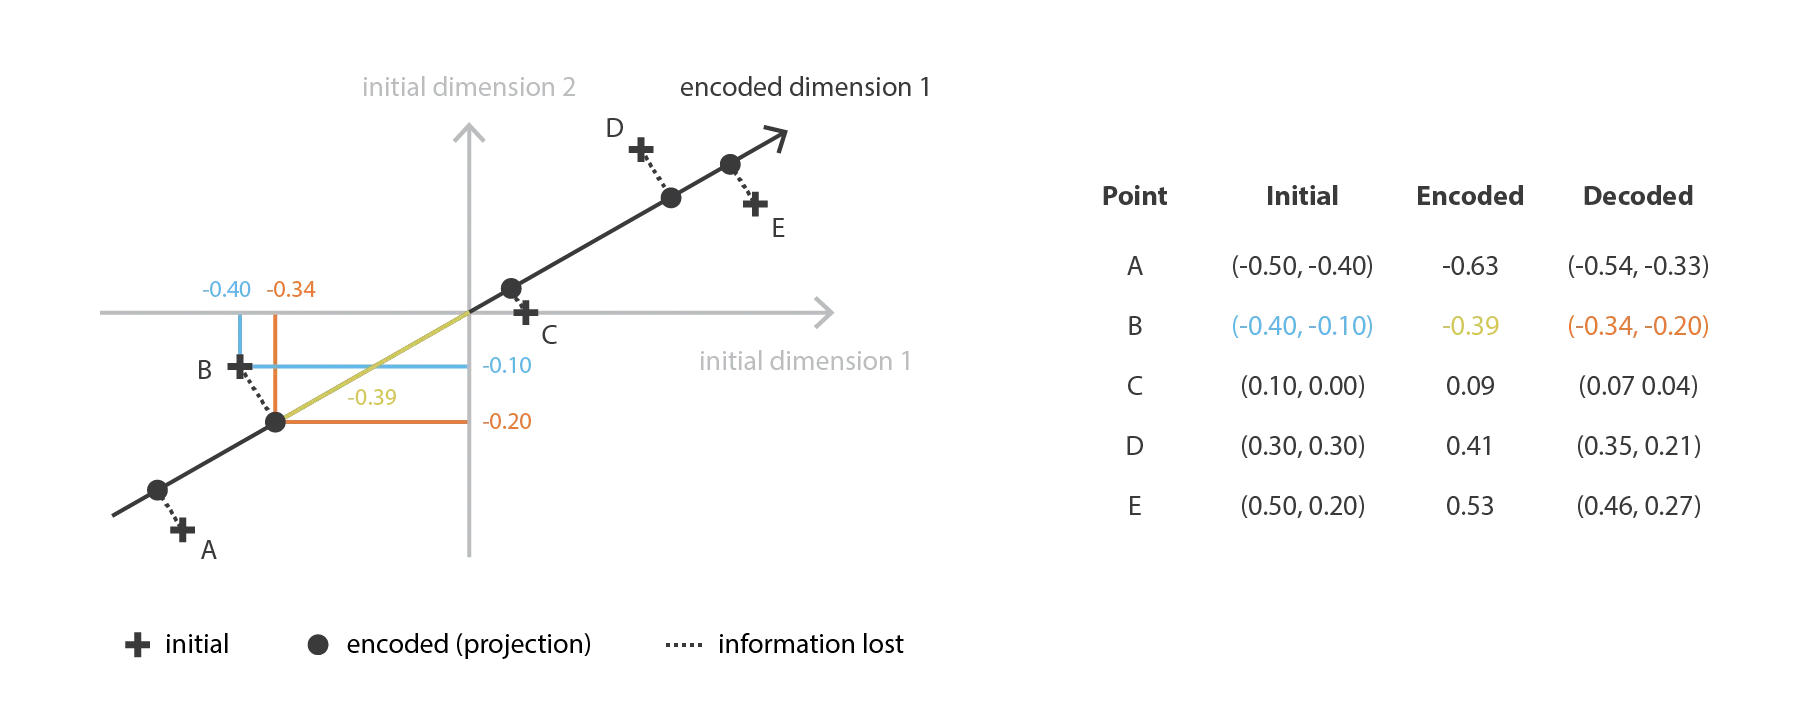

In [6]:
display(webp.load_image('../images/vae latent vector formula.webp'), 
        webp.load_image('../images/loss explained.webp'),
        webp.load_image('../images/latent space visual.webp'))

other example via [avandekleut](https://avandekleut.github.io/vae/)